In [17]:
from keras.models import load_model
import matplotlib.pyplot as plt
%matplotlib inline


In [18]:
autoencoder = load_model("autoencoder.hdf5")

In [23]:
def load_images(directory):
    
    import glob
    from keras.preprocessing.image import img_to_array,load_img
    import numpy as np

    
    path = glob.glob(directory)
    
    array_shape = (len(path), 258, 540, 1)
    image_shape = (258, 540,1)
    
    image_list = np.zeros(array_shape)
    for i, fig in enumerate(path):
        img = load_img(fig, target_size=image_shape,color_mode='grayscale')
        x = img_to_array(img).astype('float32')
        x = x / 255.0
        image_list[i] = x
    
    return image_list

In [24]:
new = load_images('data/new/*.png')
new_pred = autoencoder.predict(new)

In [25]:
new_pred = new_pred.reshape(8,258,540)
new = new.reshape(8,258,540)

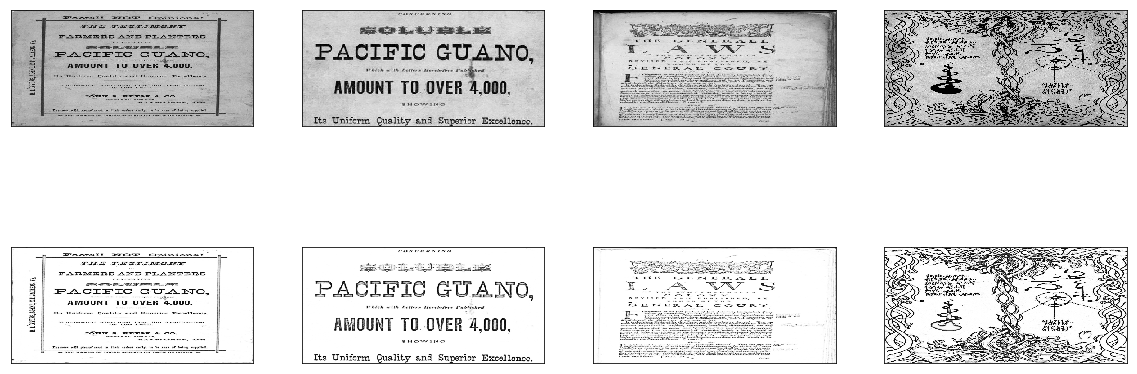

In [51]:
fig = plt.figure(figsize=(20,8))

for i in range(4):
    ax = fig.add_subplot(2, 4, i+1 , xticks=[], yticks=[])
    ax.imshow(new[i+4],cmap='gray')

    ax = fig.add_subplot(2, 4, i+5 , xticks=[], yticks=[])
    ax.imshow(new_pred[i+4],cmap='gray')

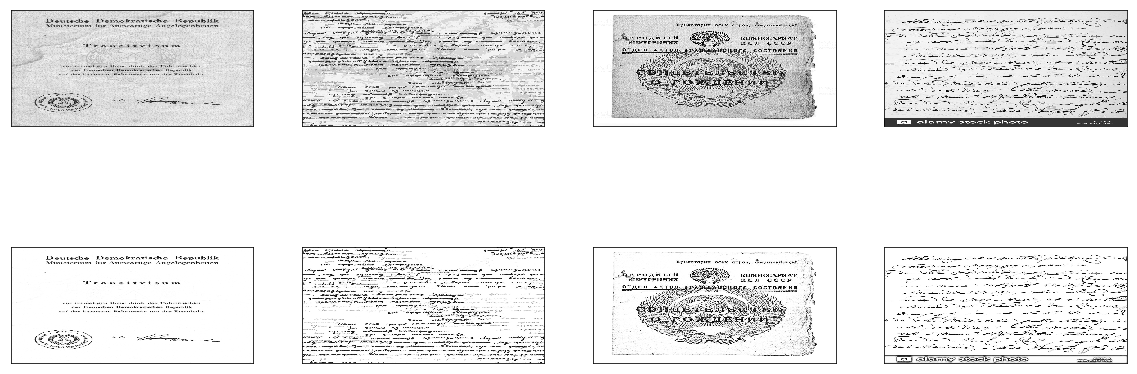

In [52]:
fig = plt.figure(figsize=(20,8))

for i in range(4):
    ax = fig.add_subplot(2, 4, i+1 , xticks=[], yticks=[])
    ax.imshow(new[i],cmap='gray')

    ax = fig.add_subplot(2, 4, i+5 , xticks=[], yticks=[])
    ax.imshow(new_pred[i],cmap='gray')
    
